In [1]:
%load_ext jupyter_tikz

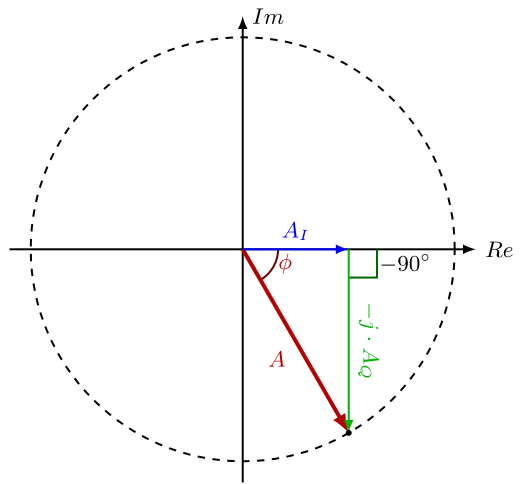

In [2]:
%%tikz -p=\include{prefix.tex} -sc=2.5 -S quadrature_to_polar.svg

\begin{tikzpicture}
  % Draw unit circle
  \draw[thick, dashed] (0,0) circle (3);

  % Draw axes
  \draw[thick, ->] (-3.3,0) -- (3.3,0) node[right]{$Re$};
  \draw[thick, ->] (0,-3.3) -- (0,3.3) node[right]{$Im$};

  % Angle theta and point on the circle
  \def\angle{-60}
  \def\radius{3}
  \coordinate (O) at (0,0);
  \coordinate (P) at ({\radius*cos(\angle)}, {\radius*sin(\angle)});
  \coordinate (B) at ({\radius*cos(\angle)}, 0);

  % Draw angle arc
  \draw[thick, red!40!black] (0.5,0) arc[start angle=0, end angle=\angle, radius=0.5];
  \draw[thick, green!40!black]($(B) + (0.4,0)$) -- ($(B) + (0.4,-0.4)$) -- ($(B) + (0,-0.4)$);
  \node[red!70!black] at (0.6,-0.2) {$\phi$};
  \node at ($(B) + (0.8, -0.2)$) {\small $-90^{\circ}$};

  % Radius
  \draw[ultra thick, ->, red!70!black] (O) -- (P) node[midway, below left] {$A$};

  % Cosine and Sine lines
  \draw[thick, blue, ->] (O) -- (B) node[midway, above] {$A_I$};
  \draw[thick, green!70!black, ->] (B) -- (P) node[midway, right, anchor=south, rotate=-90] {$-j\cdot A_Q$};

  % Point on circle
  \filldraw (P) circle (1pt);
\end{tikzpicture}

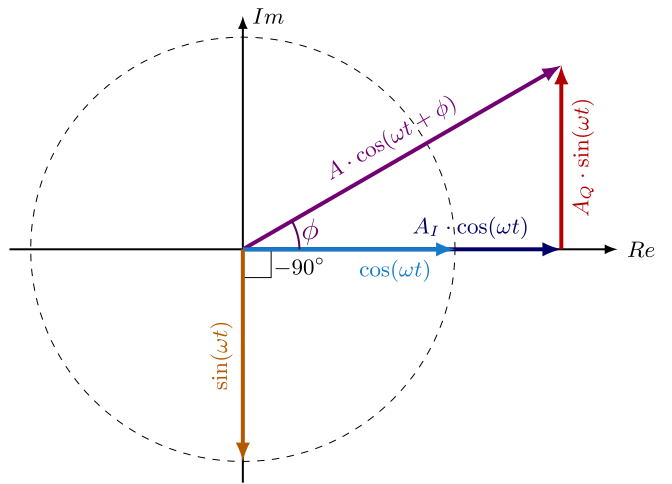

In [3]:
%%tikz -p=\include{prefix.tex} -sc=2.5 -S polar_to_quadrature.svg

\begin{tikzpicture}
  % Draw unit circle
  \draw[dashed] (0,0) circle (3);

  % Draw axes
  \draw[thick, ->] (-3.3,0) -- (5.3,0) node[right]{$Re$};
  \draw[thick, ->] (0,-3.3) -- (0,3.3) node[right]{$Im$};

  % Angle theta and point on the circle
  \def\angle{30}
  \def\radius{5.2}
  \coordinate (O) at (0,0);
  \coordinate (Y) at (0, -3);
  \coordinate (X) at (3, 0); 
  \coordinate (P) at ({\radius*cos(\angle)}, {\radius*sin(\angle)});
  \coordinate (B) at ({\radius*cos(\angle)}, 0);



  \node[violet!70!black] at (0.95,0.25) {\large $\phi$};


  % Phasor
  \draw[ultra thick, ->, violet!90!black] (O) -- (P) node[midway, below left, anchor=south, rotate=\angle] {$A\cdot \cos(\omega t + \phi)$};
  \draw[ultra thick, ->, blue!40!black] (O) -- (B) node[midway, above right] {$A_I\cdot \cos(\omega t)$};
  \draw[ultra thick, ->, red!70!black] (B) -- (P) node[midway, anchor=north, rotate=90] {$A_Q\cdot \sin(\omega t)$};

  % Cosine and Sine lines
  \draw ($(O) + (0.4,0)$) -- ($(O) + (0.4,-0.4)$) -- ($(O) + (0,-0.4)$);
  \draw[ultra thick, cyan!60!blue, ->] (O) -- (X) node[midway, below right] {$\cos(\omega t)$};
  \draw[ultra thick, orange!70!black, ->] (O) -- (Y) node[midway, left, anchor=south, rotate=90] {$\sin(\omega t)$};


  % Draw angle arc
  \draw[thick, violet!70!black] (0.8,0) arc[start angle=0, end angle=\angle, radius=0.8];
  \node at ($(O) + (0.8, -0.25)$) {\small $-90^{\circ}$};

  % Point on circle
  %\filldraw (P) circle (1pt);
\end{tikzpicture}

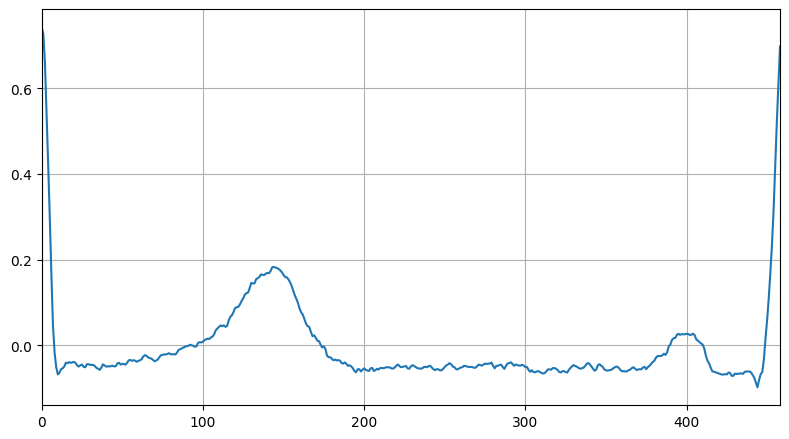

In [4]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

data = loadmat("../data/single_ecg_pulse.mat", squeeze_me=True)
heartbeat = data['s']
plt.plot(heartbeat)

# 3D ECG Plot

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import resample
from scipy.io import loadmat
%matplotlib inline
# Close all figures, clear variables
plt.close('all')


data = loadmat("../data/single_ecg_pulse.mat", squeeze_me=True)
heartbeat = data['s']

fs = data['fs']
N = len(heartbeat)
heartbeat = np.roll(heartbeat, N//2)

# Parameters

K_set = 40

t = np.linspace(0, len(heartbeat)/fs, len(heartbeat), endpoint=False)

# Remove DC component and FFT
xn = heartbeat - np.mean(heartbeat)
Xf = fft(xn)

# 3D Plot of harmonics
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.plot3D(t, np.zeros(N), xn, color=[0.6350, 0.0780, 0.1840], linewidth=3)

ax.set_xlim(0, N/fs)
ax.set_ylim(0, K_set)
#ax.set_zlim(-90, 430)
ax.set_xticks(np.arange(0, 1.01, 0.25))
ax.set_yticks(np.arange(10, K_set+1, 10))
ax.set_zticks([])

for i in range(1, K_set+1):
    A = 2 * np.abs(Xf[i]) / (N)
    Th = np.angle(Xf[i])
    xn2 = A * np.cos(2 * np.pi * i * t + Th)

    ax.plot3D(t, i*np.ones(N), xn2, color=[0, 0.4470, 0.7410], linewidth=1, linestyle=':')
    ax.plot3D(np.zeros(N), i*np.ones(N), np.linspace(0, N/fs, N) * 2 * A * 2-0.1, color=[0.8500, 0.3250, 0.0980], linewidth=3)

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Frequency (Hz)')
ax.set_zlabel('Signal Amplitude')
ax.set_zlim(zmin=-0.1, zmax=max(heartbeat))
ax.view_init(elev=20, azim=-140, roll=0)
fig.tight_layout()
fig.savefig("ECG_spectrum_3D.svg")

In [6]:
# Time domain signal plot
plt.figure(figsize=(9,6))
plt.plot(t, heartbeat, linewidth=2, color=[0.6350, 0.0780, 0.1840])
plt.xlabel('Time (seconds)')
plt.yticks([])
plt.grid(False)
plt.ylabel('Signal Amplitude')
plt.title('ECG Signal')
plt.savefig('ECG_signal_plot.svg')

In [7]:
from scipy.io import loadmat
data = loadmat("../data/ecg_data.mat", squeeze_me=True)
heartbeat2 = data['s']

fs = data['fs']

plt.figure(figsize=(9,6))
plt.magnitude_spectrum(heartbeat2, Fs=fs);
#plt.annotate(text="Here", xy=(50, .01), xytext=(70, 0.01))
plt.title("ECG Spectrum")
plt.savefig("ECG_spectrum_plot.svg")

In [8]:
# Time domain signal plot

x = heartbeat + np.sin(2*np.pi*50*t)*0.1


plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t, x)
plt.xlabel('Time (seconds)')
plt.yticks([])
plt.grid(False)
plt.ylabel('Signal Amplitude')
plt.title('ECG with mains interference')

plt.subplot(1,2,2)
plt.magnitude_spectrum(x, Fs=fs)
plt.annotate(
    'Mains \nInterference',             # Text label
    xy=(50, .05),                 # Point to annotate
    xytext=(70, .035),   # Position of the text
    arrowprops=dict(color='tab:red', arrowstyle='->')
)
plt.title('Spectrum of noisy ECG')

plt.savefig('ECG_signal_mains_noise.svg')